In [1]:
import sys
sys.path.append('../')

import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from agents import Group
from agent import Agent

### Talk

 
[2024-12-13 12:12:10][INFO]: All agents are fully connected


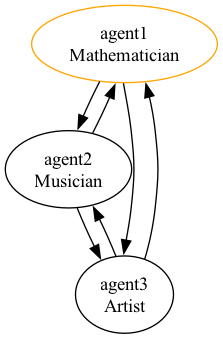

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician", 
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              model_client=model_client,
              verbose=True),

        Agent(name="agent3", 
              role="Artist", 
              description="Transfer to me if you need help with art.",
              model_client=model_client,
              verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [26]:
_ = g.talk("What can you guys as a group do?")

 
[2024-12-12 16:25:23][INFO]: User input (talk): What can you guys as a group do?
 
[2024-12-12 16:25:33][INFO]: handoff from agent1 to agent3 by using auto2 mode
 
[2024-12-12 16:25:34][INFO]: Calling OpenAI agent [agent3]
 
[2024-12-12 16:25:36][INFO]: Agent agent3 response:

As a group, we can collaborate to blend our individual talents! The mathematician can help with the structure and precision of art, the musician can provide an auditory experience to accompany visual art, and I, as the artist, can create engaging visuals. Together, we could develop a multimedia project that combines music, mathematics, and visual art to create a unique artistic experience.


In [27]:
_ = g.talk("Can you explain the concept of complex numbers?")

 
[2024-12-12 16:26:08][INFO]: User input (talk): Can you explain the concept of complex numbers?
 
[2024-12-12 16:26:10][INFO]: handoff from agent3 to agent1 by using auto2 mode
 
[2024-12-12 16:26:11][INFO]: Calling Dify agent [agent1]
 
[2024-12-12 16:26:21][INFO]: Agent agent1 response:

Complex numbers are numbers that have a real part and an imaginary part. They are expressed in the form \( a + bi \), where \( a \) is the real part, \( b \) is the imaginary part, and \( i \) is the imaginary unit, defined as \( i = \sqrt{-1} \).

### Key Concepts:

1. **Real Numbers**: The set of numbers that can be found on the number line, including both rational and irrational numbers.

2. **Imaginary Numbers**: Numbers that can be written as a real number multiplied by \( i \). For example, \( 3i \) is an imaginary number.

3. **Complex Plane**: Complex numbers can be represented graphically on a plane known as the complex plane, where the x-axis represents the real part and the y-axis repres

In [28]:
_ = g.talk("I want to learn some instruments.")

 
[2024-12-12 16:26:21][INFO]: User input (talk): I want to learn some instruments.
 
[2024-12-12 16:26:22][INFO]: handoff from agent1 to agent2 by using auto2 mode
 
[2024-12-12 16:26:23][INFO]: Calling OpenAI agent [agent2]
 
[2024-12-12 16:26:28][INFO]: Agent agent2 response:

That's great! Learning an instrument can be a rewarding experience. Here are a few steps to get started:

1. **Choose an Instrument**: Think about what interests you the most. Popular options include:
   - **Guitar**: Great for beginners and versatile across many music genres.
   - **Piano/Keyboard**: Excellent for understanding music theory and harmony.
   - **Drums**: Fun and helps with rhythm.
   - **Violin**: Offers a rich, expressive sound but can be challenging to master.
   - **Flute**: A woodwind instrument that is relatively easy to learn.

2. **Find a Teacher or Resources**: You can choose face-to-face lessons or online courses. There are also many apps and YouTube videos available for self-study.

3

### Task

 
[2024-12-13 12:12:13][INFO]: All agents are fully connected


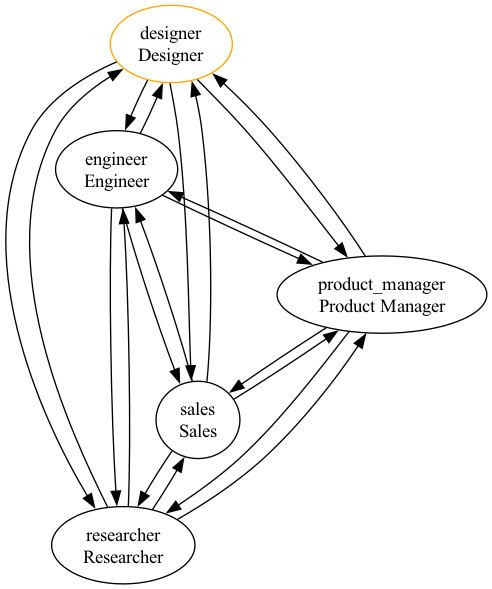

In [3]:
from utilities.tools import web_search
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are entrepreneurs building a new product. Now is December 2024",
    members=[
        Agent(name = "designer",
              role = "Designer", 
              description = "Transfer to me if you need help with design.",
              model_client = model_client,
              verbose = True),

        Agent(name="engineer",
              role="Engineer",
              description="Transfer to me if you need help with engineering.",
              model_client=model_client,                
              verbose=True),

        Agent(name="researcher",
                role="Researcher",
                description="Transfer to me if you need help with research.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="sales",
                role="Sales",
                description="Transfer to me if you need help with sales.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="product_manager",
                  role="Product Manager",
                  description="Transfer to me if you need help with product management.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [4]:
_ = g.task("I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?",model="gpt-4o-mini",strategy="auto")

 
[2024-12-13 12:12:13][INFO]: Start planning the task
 
[2024-12-13 12:12:17][INFO]: Planning finished
 
[2024-12-13 12:12:17][INFO]: Initial plan is 

{"agent_name":"researcher","task":"Conduct market research to identify target demographics and preferences for a simplistic and user-friendly bicycle.","receive_information_from":[]}
{"agent_name":"designer","task":"Create initial design concepts for the bicycle focusing on simplicity and user-friendliness.","receive_information_from":["researcher"]}
{"agent_name":"engineer","task":"Develop technical specifications and feasibility analysis for the bicycle design.","receive_information_from":["designer"]}
{"agent_name":"product_manager","task":"Compile the business plan including market analysis, product design, and engineering specifications.","receive_information_from":["researcher","designer","engineer"]}
{"agent_name":"sales","task":"Develop a sales strategy and identify potential distribution channels for the bicycle.","receive_inf